In [1]:
import sys, os

# Projektroot = eine Ebene über notebooks/
project_root = os.path.abspath("..")
print("Project root:", project_root)

# Nur hinzufügen, wenn noch nicht vorhanden
if project_root not in sys.path:
    sys.path.append(project_root)

print("sys.path enthält project_root:", project_root in sys.path)


Project root: /Users/andregrau/Desktop/Thesis/Tool/Python_Tool/simLIS
sys.path enthält project_root: True


In [2]:
import os, sys
print("sys.path: ", sys.path)
print("model exists:", os.path.isdir("../model"))
print("init exists:", os.path.isfile("../model/__init__.py"))
print("sim_model exists:", os.path.isfile("../model/sim_model.py"))


sys.path:  ['/opt/anaconda3/envs/test1/lib/python313.zip', '/opt/anaconda3/envs/test1/lib/python3.13', '/opt/anaconda3/envs/test1/lib/python3.13/lib-dynload', '', '/opt/anaconda3/envs/test1/lib/python3.13/site-packages', '/Users/andregrau/Desktop/Thesis/Tool/Python_Tool/simLIS']
model exists: True
init exists: True
sim_model exists: True


In [3]:
from model.sim_model import load_scenario, simulate_load_profile

scenario_name = "office"            # gewünschtes Scenario eingeben
scenario_path = f"../scenarios/{scenario_name}.yaml"

scenario = load_scenario(scenario_path)
timestamps, load_kw, sessions = simulate_load_profile(scenario)


In [4]:
timestamps, load_kw, sessions = simulate_load_profile(scenario)
len(timestamps), load_kw[:10]


(672, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

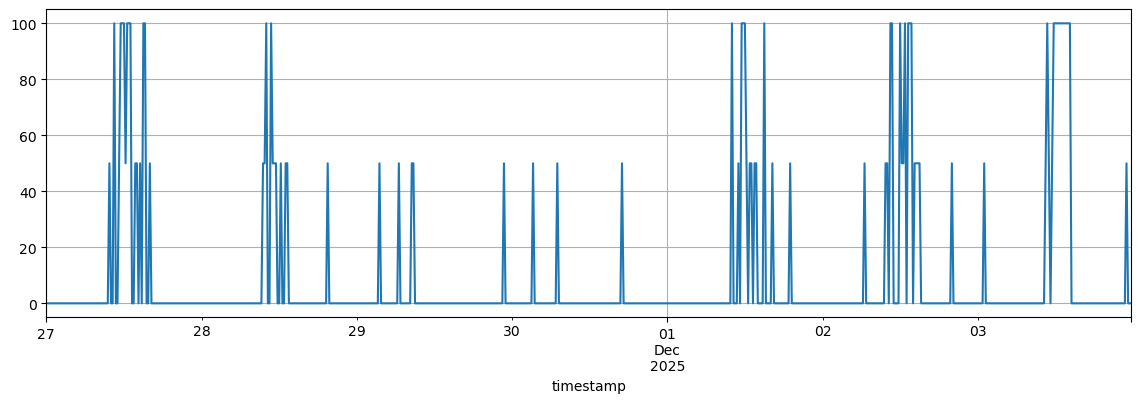

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"timestamp": timestamps, "load_kw": load_kw})
df = df.set_index("timestamp")

df["load_kw"].plot(figsize=(14,4))
plt.grid(True)
plt.show()


In [ ]:
from Model.sim_model import load_scenario, simulate_load_profile
from Model.postprocessing import extend_profile, aggregate_daily_energy_kwh

scenario = load_scenario("../scenarios/office.yaml")

# Basis (z.B. 7 Tage) simulieren
timestamps_base, load_kw_base, sessions = simulate_load_profile(scenario)

# Zielhorizont bestimmen (z.B. aus YAML)
target_days = scenario.get("result_horizon_days", scenario["sim_horizon_days"])

# Profil ggf. erweitern
timestamps, load_kw = extend_profile(
    timestamps_base,
    load_kw_base,
    target_days=target_days,
    noise_std=0.0,          # oder z.B. 0.05
    random_seed=42,
)

# Tagesenergien berechnen
daily_energy = aggregate_daily_energy_kwh(timestamps, load_kw)
